## Import libraries

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import operator

from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import normalize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

import warnings            
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

%matplotlib inline

## Load Summary of weather dataset

In [2]:
#Load the datasets
weather_data = pd.read_csv('Summary of Weather.csv')
weather_data.head()

STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 NaN  NaN  
3 NaN  NaN  
4 NaN  NaN  

[5 rows x 31 columns]

In [3]:
print (weather_data.isnull().sum() / weather_data.shape[0] * 100)

STA              0.000000
Date             0.000000
Precip           0.000000
WindGustSpd     99.553091
MaxTemp          0.000000
MinTemp          0.000000
MeanTemp         0.000000
Snowfall         0.976983
PoorWeather     71.239079
YR               0.000000
MO               0.000000
DA               0.000000
PRCP             1.622984
DR              99.552251
SPD             99.553091
MAX              0.398185
MIN              0.393145
MEA              0.418347
SNF              0.976983
SND             95.326781
FT             100.000000
FB             100.000000
FTI            100.000000
ITH            100.000000
PGT             99.558972
TSHDSBRSGF      71.239079
SD3            100.000000
RHX            100.000000
RHN            100.000000
RVG            100.000000
WTE            100.000000
dtype: float64


# Clean the dataset

In [4]:
cols = [col for col in weather_data.columns if(weather_data[col].isnull().sum() / weather_data.shape[0] * 100 < 70)]
weather_newdata = weather_data[cols]
print('Legitimate columns after dropping null columns:',weather_newdata.shape[1])

Legitimate columns after dropping null columns: 15


In [5]:
weather_newdata.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

In [6]:
weather_newdata.sample(5)

STA        Date Precip    MaxTemp    MinTemp   MeanTemp Snowfall  \
94944   34147   1945-10-7      T  20.000000   7.222222  13.333333        0   
86930   33305   1945-9-11      0  33.888889  17.222222  25.555556        0   
84504   33117   1944-10-5      T  29.444444  17.777778  23.333333        0   
64627   31501  1944-11-13      0  33.333333  21.111111  27.222222        0   
117222  82502   1943-10-1      0  27.222222   8.888889  17.777778        0   

        YR  MO  DA PRCP   MAX   MIN   MEA SNF  
94944   45  10   7    T  68.0  45.0  56.0   0  
86930   45   9  11    0  93.0  63.0  78.0   0  
84504   44  10   5    T  85.0  64.0  74.0   0  
64627   44  11  13    0  92.0  70.0  81.0   0  
117222  43  10   1    0  81.0  48.0  64.0   0

In [7]:
weather_newdata.dtypes

STA           int64
Date         object
Precip       object
MaxTemp     float64
MinTemp     float64
MeanTemp    float64
Snowfall     object
YR            int64
MO            int64
DA            int64
PRCP         object
MAX         float64
MIN         float64
MEA         float64
SNF          object
dtype: object

In [8]:
#Convert the data type of each column
weather_newdata['Precip'] = pd.to_numeric(weather_newdata['Precip'], errors = 'coerce')
weather_newdata['Snowfall'] = pd.to_numeric(weather_newdata['Snowfall'], errors = 'coerce')
weather_newdata['SNF'] = pd.to_numeric(weather_newdata['SNF'], errors = 'coerce')
weather_newdata['PRCP'] = pd.to_numeric(weather_newdata['PRCP'], errors = 'coerce')
weather_newdata['Date'] = pd.to_datetime(weather_newdata['Date'])

In [9]:
#Fill the missing values
weather_newdata.fillna(method = 'ffill', inplace = True)
weather_newdata.fillna(method = 'bfill', inplace = True)
weather_newdata.isnull().sum()

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
PRCP        0
MAX         0
MIN         0
MEA         0
SNF         0
dtype: int64

In [10]:
weather_newdata.head()

STA       Date  Precip    MaxTemp    MinTemp   MeanTemp  Snowfall  YR  \
0  10001 1942-07-01   1.016  25.555556  22.222222  23.888889       0.0  42   
1  10001 1942-07-02   0.000  28.888889  21.666667  25.555556       0.0  42   
2  10001 1942-07-03   2.540  26.111111  22.222222  24.444444       0.0  42   
3  10001 1942-07-04   2.540  26.666667  22.222222  24.444444       0.0  42   
4  10001 1942-07-05   0.000  26.666667  21.666667  24.444444       0.0  42   

   MO  DA  PRCP   MAX   MIN   MEA  SNF  
0   7   1  0.04  78.0  72.0  75.0  0.0  
1   7   2  0.00  84.0  71.0  78.0  0.0  
2   7   3  0.10  79.0  72.0  76.0  0.0  
3   7   4  0.10  80.0  72.0  76.0  0.0  
4   7   5  0.00  80.0  71.0  76.0  0.0

In [11]:
min_max = weather_newdata[['Date','MaxTemp', 'MinTemp', 'MeanTemp', 'Precip' ]]
min_max.head()

Date    MaxTemp    MinTemp   MeanTemp  Precip
0 1942-07-01  25.555556  22.222222  23.888889   1.016
1 1942-07-02  28.888889  21.666667  25.555556   0.000
2 1942-07-03  26.111111  22.222222  24.444444   2.540
3 1942-07-04  26.666667  22.222222  24.444444   2.540
4 1942-07-05  26.666667  21.666667  24.444444   0.000

In [12]:
first_year = min_max.loc[0:365]
first_year_max_temp = first_year['MaxTemp'].max()
second_year = min_max.loc[366:730]
third_year = min_max.loc[731:1095]
fourth_year = min_max.loc[118887:119039]
first_year.Date = '1942'
second_year.Date = '1943'
third_year.Date = '1944'
fourth_year.Date = '1945'

frames = [first_year,second_year,third_year,fourth_year]
newmin_max = pd.concat(frames)
x = newmin_max.Date
newmin_max


Date    MaxTemp    MinTemp   MeanTemp  Precip
0       1942  25.555556  22.222222  23.888889   1.016
1       1942  28.888889  21.666667  25.555556   0.000
2       1942  26.111111  22.222222  24.444444   2.540
3       1942  26.666667  22.222222  24.444444   2.540
4       1942  26.666667  21.666667  24.444444   0.000
...      ...        ...        ...        ...     ...
119035  1945  28.333333  18.333333  23.333333   0.000
119036  1945  29.444444  18.333333  23.888889   9.906
119037  1945  28.333333  18.333333  23.333333   0.000
119038  1945  28.333333  18.333333  23.333333   0.000
119039  1945  29.444444  17.222222  23.333333   0.000

[1249 rows x 5 columns]

# Relationship between min and max temperature

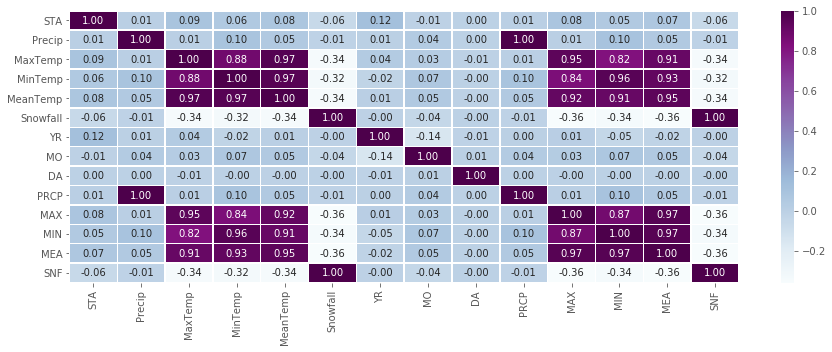

In [13]:
#Correlation matrix
f,ax = plt.subplots(figsize = (15,5))
sns.heatmap(weather_newdata.corr(), annot = True, linewidth = 0.5, fmt = '.2f', ax = ax, cmap = 'BuPu')
plt.show()

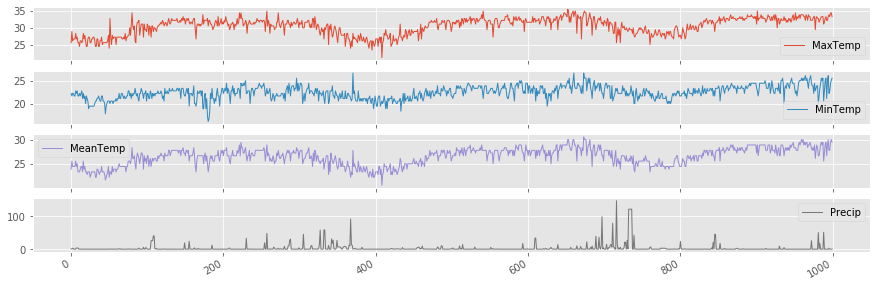

In [14]:
plt.style.use('ggplot')
weather_newdata = weather_newdata[:][:1000]
axes = weather_newdata[["MaxTemp","MinTemp","MeanTemp","Precip"]].plot(figsize = (15,5), subplots = True, linewidth = 1)

Text(0, 0.5, 'Frequency')

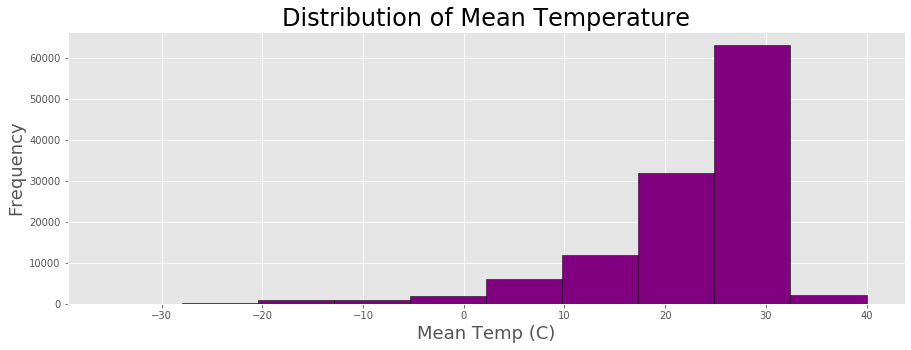

In [15]:
#histogram of mean temperature
min_max.MeanTemp.plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (15,5))
plt.title('Distribution of Mean Temperature', size=24)
plt.xlabel('Mean Temp (C)', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

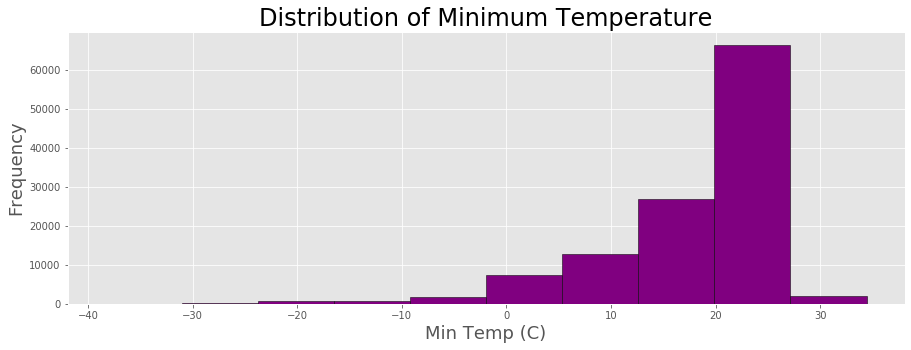

In [16]:
#Histogram of Minimum Temperature
min_max.MinTemp.plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (15,5))
plt.title('Distribution of Minimum Temperature', size=24)
plt.xlabel('Min Temp (C)', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

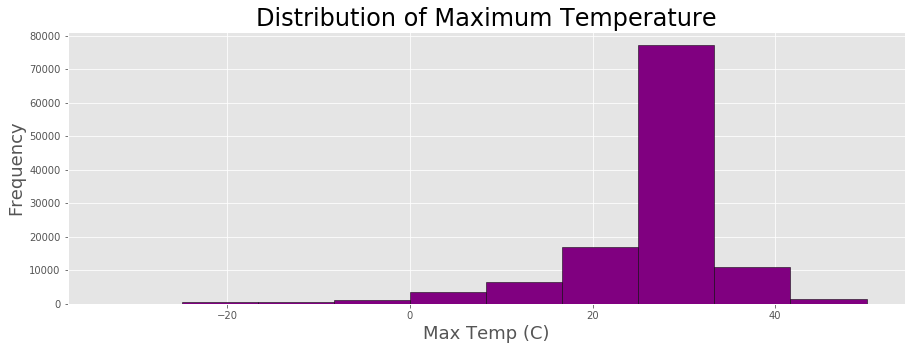

In [17]:
#Histogram of Maximum Temperature
min_max.MaxTemp.plot(kind = 'hist', color = 'Purple', edgecolor = 'black', figsize = (15,5))
plt.title('Distribution of Maximum Temperature', size=24)
plt.xlabel('Max Temp (C)', size=18)
plt.ylabel('Frequency', size=18)

Text(0.5, 1.0, 'Max Temperature of years')

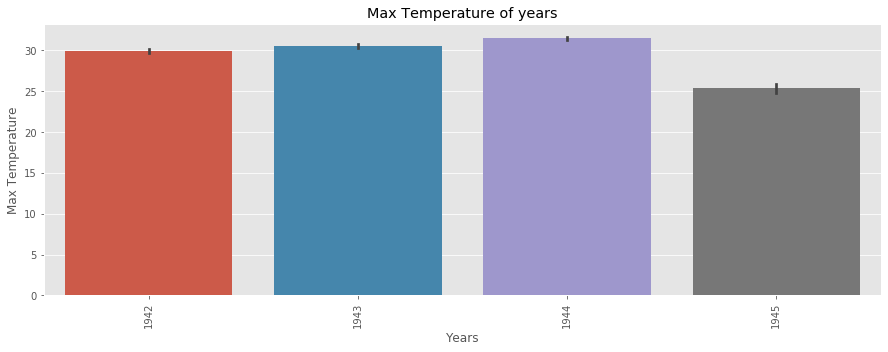

In [18]:
plt.figure(figsize = (15,5))
sns.barplot(x = x, y = newmin_max.MaxTemp)
plt.xticks(rotation = 90)
plt.xlabel('Years')
plt.ylabel('Max Temperature')
plt.title('Max Temperature of years')

Text(0.5, 1.0, 'Minimum Temperature of years')

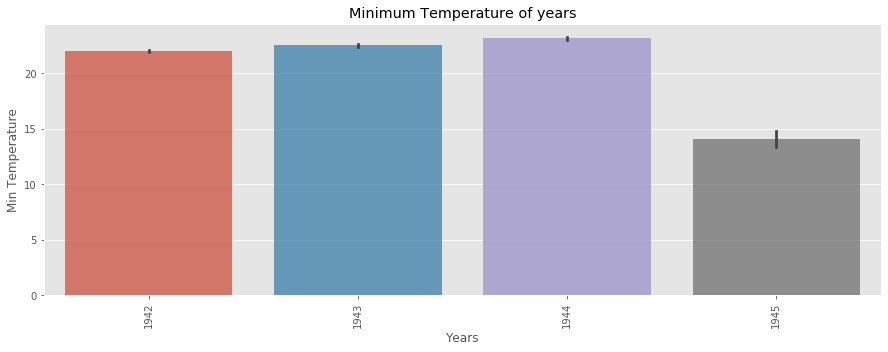

In [19]:
plt.figure(figsize = (15,5))
sns.barplot(x = x, y = newmin_max.MinTemp, alpha = 0.8)
plt.xticks(rotation = 90)
plt.xlabel('Years')
plt.ylabel('Min Temperature')
plt.title('Minimum Temperature of years')

Text(0.5, 1.0, 'Precipitation of years')

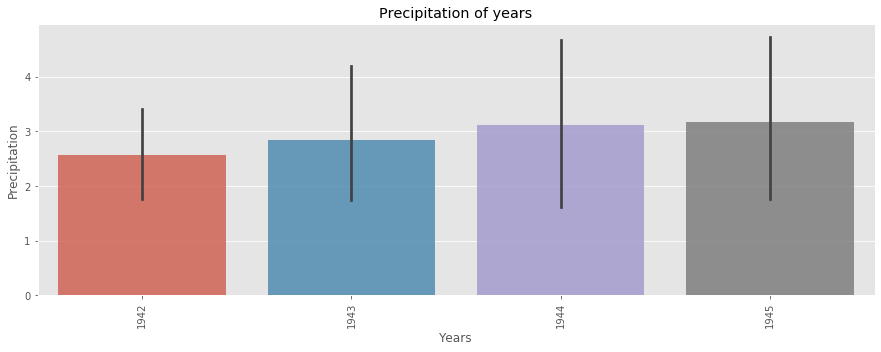

In [20]:
plt.figure(figsize = (15,5))
sns.barplot(x = x, y = newmin_max.Precip, alpha = 0.8)
plt.xticks(rotation = 90)
plt.xlabel('Years')
plt.ylabel('Precipitation')
plt.title('Precipitation of years')

### Scatter plot

In [21]:
new_min_max = min_max[:][:750]
len(new_min_max)

750

In [22]:
new_min_max['MinTemp'].isna().value_counts()
new_min_max['MaxTemp'].isna().value_counts()
new_min_max = new_min_max.dropna(axis = 0, how = "any")
len(new_min_max)

750

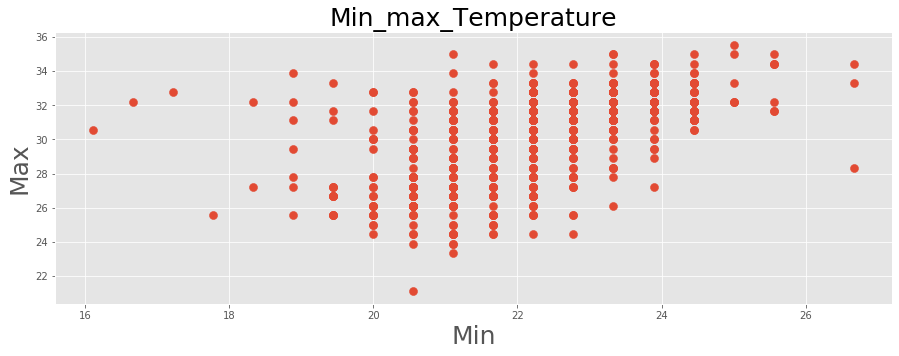

In [23]:
plt.figure(figsize = (15,5))
plt.scatter(new_min_max['MinTemp'], new_min_max['MaxTemp'], s = 65)
plt.xlabel('Min', fontsize = 25)
plt.ylabel('Max', fontsize = 25)
plt.title('Min_max_Temperature', fontsize = 25)
plt.show()

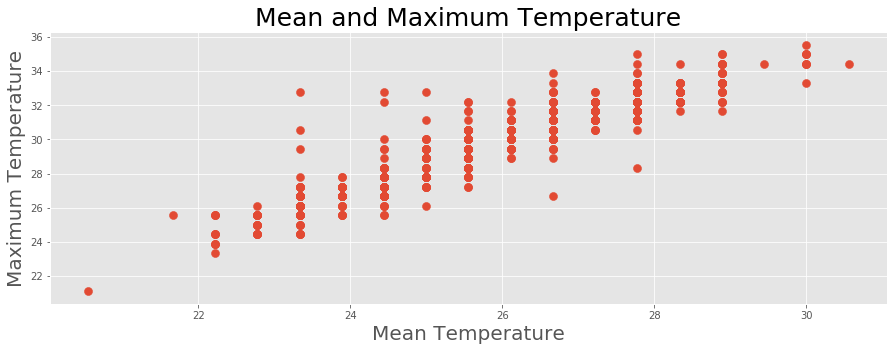

In [24]:
plt.figure(figsize = (15,5))
plt.scatter(new_min_max['MeanTemp'], new_min_max['MaxTemp'], s = 65)
plt.xlabel('Mean Temperature', fontsize = 20)
plt.ylabel('Maximum Temperature', fontsize = 20)
plt.title('Mean and Maximum Temperature', fontsize = 25)
plt.show()

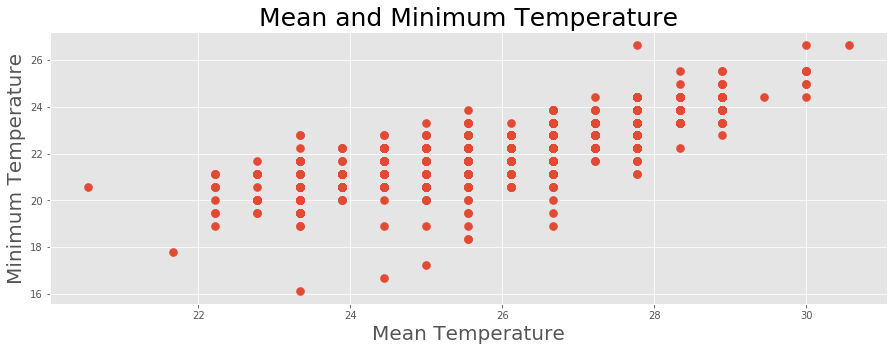

In [25]:
plt.figure(figsize = (15,5))
plt.scatter(new_min_max['MeanTemp'], new_min_max['MinTemp'], s = 65)
plt.xlabel('Mean Temperature', fontsize = 20)
plt.ylabel('Minimum Temperature', fontsize = 20)
plt.title('Mean and Minimum Temperature', fontsize = 25)
plt.show()

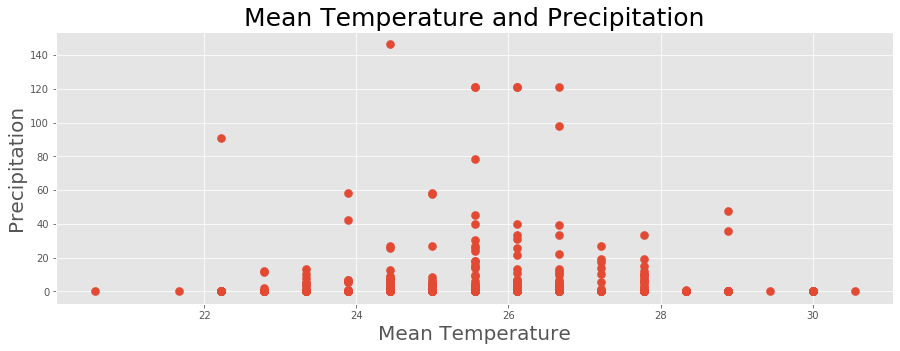

In [26]:
plt.figure(figsize = (15,5))
plt.scatter(new_min_max['MeanTemp'], new_min_max['Precip'], s = 65)
plt.xlabel('Mean Temperature', fontsize = 20)
plt.ylabel('Precipitation', fontsize = 20)
plt.title('Mean Temperature and Precipitation', fontsize = 25)
plt.show()

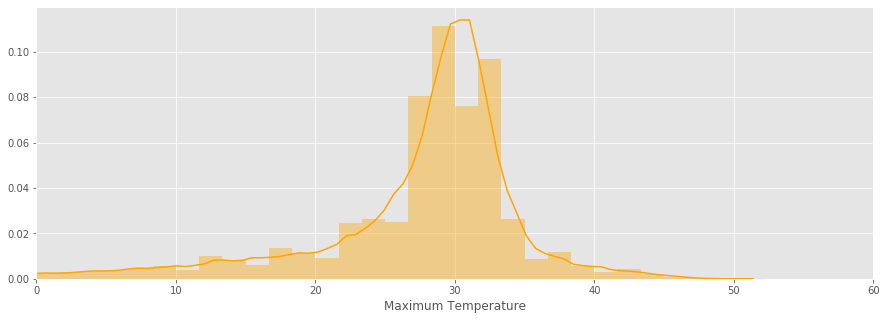

In [27]:
plt.figure(figsize = (15,5))
sns.distplot(min_max['MaxTemp'], color = 'orange')
plt.xlabel('Maximum Temperature')
plt.xlim(0,60)
plt.show()

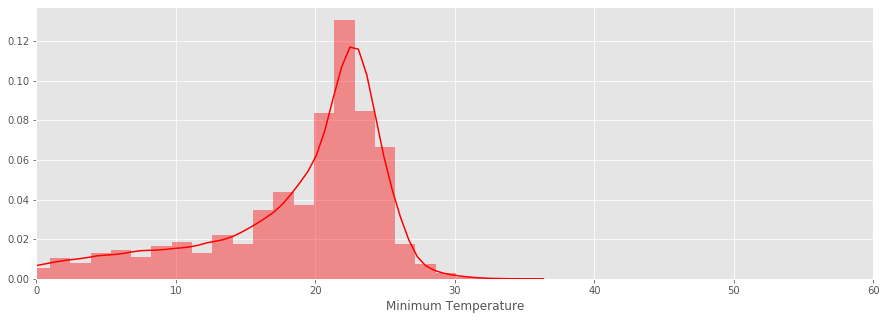

In [28]:
plt.figure(figsize = (15,5))
sns.distplot(min_max['MinTemp'], color = 'red')
plt.xlabel('Minimum Temperature')
plt.xlim(0,60)
plt.show()

# Predicting maximum temperature using minimum temperature

In [29]:
y = np.array(new_min_max['MaxTemp']).reshape(-1,1)
X = np.array(new_min_max['MinTemp']).reshape(-1,1)

In [30]:
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size = 0.20, random_state = 42)

## 1. Linear Regression

In [31]:
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
l_pred= regressor.predict(X_train)

In [33]:
print("Accuracy of Linear Regression model: " + "{:.1%}".format(regressor.score(X_train,y_train)))
print("R2 score of Linear Regression model: " + "{:.3}".format(r2_score(y_train,l_pred)))

Accuracy of Linear Regression model: 30.4%
R2 score of Linear Regression model: 0.304


In [34]:
l_predict = regressor.predict(X_test)

In [35]:
print("Accuracy of Linear Regression model: " + "{:.1%}".format(regressor.score(X_test,y_test)))
print("R2 score of Linear Regression model: " + "{:.3}".format(r2_score(y_test,l_predict)))

Accuracy of Linear Regression model: 29.7%
R2 score of Linear Regression model: 0.297


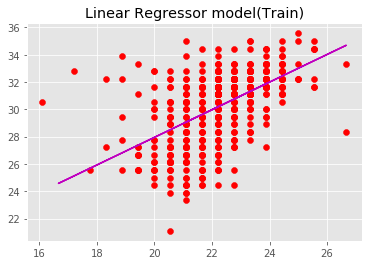

In [36]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_test,regressor.predict(X_test),c='m')
plt.title("Linear Regressor model(Train)")
plt.show()

In [37]:
X = np.array([10,20,30,40,50]).reshape(-1,1)
print("Results")
for i in X:
    print(" For Min", i, "Predicted Max:", regressor.predict([i]))

Results
 For Min [10] Predicted Max: [[17.83064252]]
 For Min [20] Predicted Max: [[27.94658804]]
 For Min [30] Predicted Max: [[38.06253355]]
 For Min [40] Predicted Max: [[48.17847907]]
 For Min [50] Predicted Max: [[58.29442459]]


#### Comparing Actual maximum temperature vs Predicted maximum temperature

In [38]:
df = pd.DataFrame({'Actual Temperature' : y_test.flatten(), 'Predicted Temperature' : l_predict.flatten()})
df.head(10)

Actual Temperature  Predicted Temperature
0           32.222222              31.880567
1           27.777778              29.070582
2           32.222222              31.318570
3           32.222222              31.318570
4           30.000000              30.756573
5           33.333333              32.442564
6           31.111111              30.756573
7           31.666667              27.384591
8           32.777778              31.880567
9           29.444444              30.756573

#### Visualizing the variation in the Actual vs Predicted

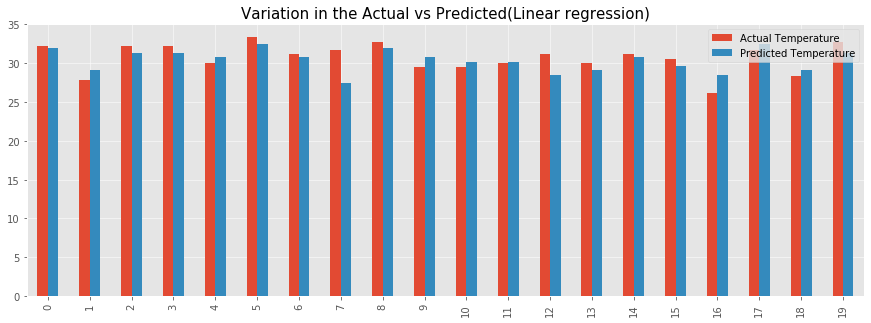

In [39]:
df1 = df.head(20)
df1.plot(kind = 'bar', figsize = (15,5))
plt.grid(which = 'both', linestyle = '-', linewidth = '0.5')
plt.title('Variation in the Actual vs Predicted(Linear regression)', fontsize = 15)
plt.show()

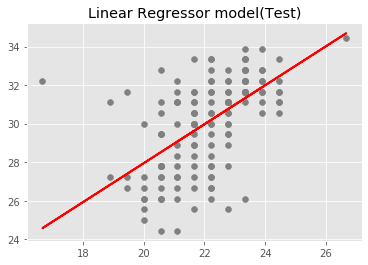

In [40]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,l_predict,color = 'red',linewidth = 2)
plt.title("Linear Regressor model(Test)")
plt.show()

## 2. Polynomial regression

In [41]:
poly_df = PolynomialFeatures(degree = 5)
transform_poly = poly_df.fit_transform(X_train)

poly_reg = LinearRegression().fit(transform_poly, y_train)
poly_predict = poly_reg.predict(transform_poly)

In [42]:
rmse = np.sqrt(mean_squared_error(y_train,poly_predict))
r2 = r2_score(y_train,poly_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 2.1
R2 Score for Test set: 0.36


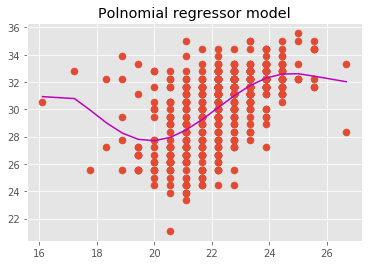

In [43]:
plt.scatter(X_train, y_train, s=50)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,poly_predict), key=sort_axis)
X_train, poly_predict = zip(*sorted_zip)
plt.plot(X_train, poly_predict, color='m')
plt.title("Polnomial regressor model")
plt.show()

## 3. Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor().fit(X_train,y_train)
dt_predict = dt_reg.predict(X_train)
dt_pred = dt_reg.predict(X_test)

In [45]:
X = np.array([10,20,30,40,50]).reshape(-1,1)
print("Results")
for i in X:
    print(" For Min", i, "Predicted Max:", dt_reg.predict([i]))

Results
 For Min [10] Predicted Max: [28.88888889]
 For Min [20] Predicted Max: [30.0308642]
 For Min [30] Predicted Max: [26.94444445]
 For Min [40] Predicted Max: [26.94444445]
 For Min [50] Predicted Max: [26.94444445]


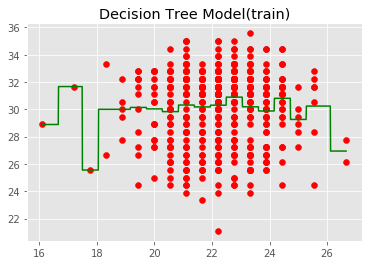

In [46]:
plt.scatter(X_train,y_train, color="red")                           
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt_reg.predict(X_grid),color="g")               
plt.title("Decision Tree Model(train)")
plt.show()

In [47]:
rmse = np.sqrt(mean_squared_error(y_train,dt_predict))
r2 = r2_score(y_train,dt_predict)
print("RMSE Score for Train set: " +"{:.2}".format(rmse))
print("R2 Score for Train set: " +"{:.2}".format(r2))

RMSE Score for Train set: 2.5
R2 Score for Train set: 0.029


In [48]:
rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
r2 = r2_score(y_test,dt_pred)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 2.4
R2 Score for Test set: -0.03


#### Comparing Actual maximum temperature vs Predicted maximum temperature

In [49]:
df_tree = pd.DataFrame({'Actual Maximum Temperature' : y_test.flatten(), 'Predicted Maximum Temperature' : dt_pred.flatten()})
df_tree.head(10)

Actual Maximum Temperature  Predicted Maximum Temperature
0                   32.222222                      29.878788
1                   27.777778                      30.314010
2                   32.222222                      30.185185
3                   32.222222                      30.185185
4                   30.000000                      30.892857
5                   33.333333                      30.806452
6                   31.111111                      30.892857
7                   31.666667                      30.138889
8                   32.777778                      29.878788
9                   29.444444                      30.892857

#### Visualizing the variation in the Actual vs Predicted

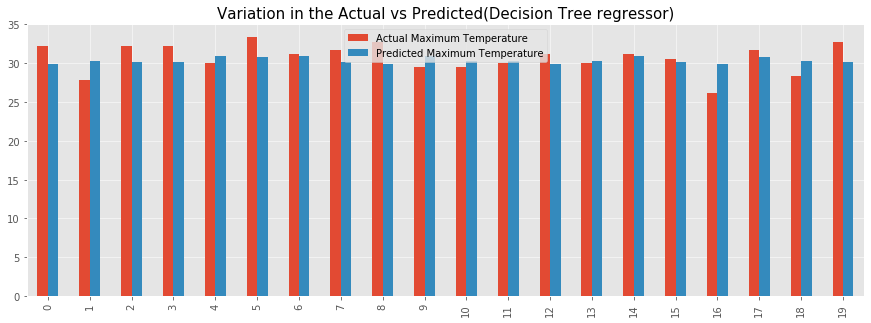

In [50]:
df1_tree = df_tree.head(20)
df1_tree.plot(kind = 'bar', figsize = (15,5))
plt.grid(which = 'both', linestyle = '-', linewidth = '0.5')
plt.title('Variation in the Actual vs Predicted(Decision Tree regressor)', fontsize = 15)
plt.show()

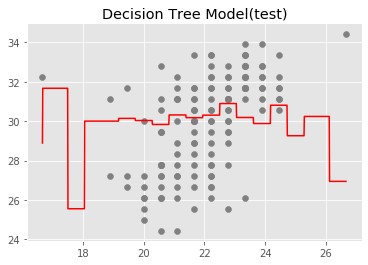

In [51]:
plt.scatter(X_test,y_test, color="grey")                           
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt_reg.predict(X_grid),color="r")               
plt.title("Decision Tree Model(test)")
plt.show()

## 4. Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 5, random_state = 0).fit(X_train,y_train)
rf_predict = rf_reg.predict(X_train)
rf_pred = rf_reg.predict(X_test)

In [53]:
X = np.array([10,20,30,40,50]).reshape(-1,1)
print("Results")
for i in X:
    print(" For Min", i, "Predicted Max:", rf_reg.predict([i]))

Results
 For Min [10] Predicted Max: [28.88888889]
 For Min [20] Predicted Max: [30.24590414]
 For Min [30] Predicted Max: [27.98333333]
 For Min [40] Predicted Max: [27.98333333]
 For Min [50] Predicted Max: [27.98333333]


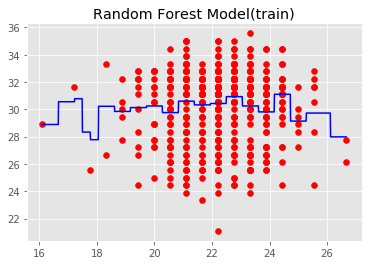

In [54]:
plt.scatter(X_train,y_train, color="red")                       
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,rf_reg.predict(X_grid),color="b")               
plt.title("Random Forest Model(train)")
plt.show()

In [55]:
rmse = np.sqrt(mean_squared_error(y_train,rf_predict))
r2 = r2_score(y_train,rf_predict)
print("RMSE Score for Train set: " +"{:.2}".format(rmse))
print("R2 Score for Train set: " +"{:.2}".format(r2))

RMSE Score for Train set: 2.5
R2 Score for Train set: 0.023


In [56]:
rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
r2 = r2_score(y_test,rf_pred)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 2.4
R2 Score for Test set: -0.037


In [57]:
df_rf = pd.DataFrame({'Actual Maximum Temperature' : y_test.flatten(), 'Predicted Maximum Temperature' : rf_pred.flatten()})
df_rf.head(10)

Actual Maximum Temperature  Predicted Maximum Temperature
0                   32.222222                      29.811828
1                   27.777778                      30.597557
2                   32.222222                      30.246298
3                   32.222222                      30.246298
4                   30.000000                      30.929718
5                   33.333333                      31.102549
6                   31.111111                      30.929718
7                   31.666667                      30.127497
8                   32.777778                      29.811828
9                   29.444444                      30.929718

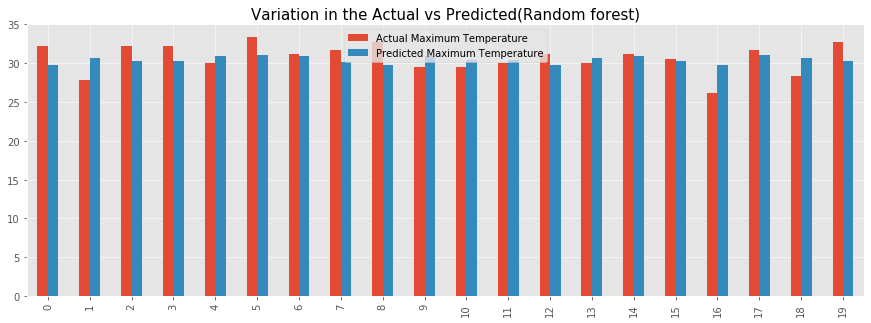

In [58]:
df1_rf = df_rf.head(20)
df1_rf.plot(kind = 'bar', figsize = (15,5))
plt.grid(which = 'both', linestyle = '-', linewidth = '0.5')
plt.title('Variation in the Actual vs Predicted(Random forest)', fontsize = 15)
plt.show()

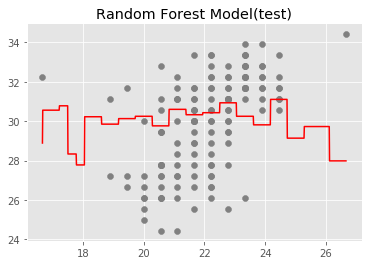

In [59]:
plt.scatter(X_test,y_test, color="gray")                       
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,rf_reg.predict(X_grid),color="r")               
plt.title("Random Forest Model(test)")
plt.show()

## EDA of operation and Weather stations dataset

In [60]:
aerial = pd.read_csv('operations.csv')

In [61]:
aerial = aerial[pd.isna(aerial.Country) == False]
aerial = aerial[pd.isna(aerial['Target Longitude']) == False]
aerial = aerial[pd.isna(aerial['Takeoff Longitude']) == False]
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']

aerial.drop(drop_list,axis = 1, inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"]
aerial = aerial[ aerial.iloc[:,9]!=1355]

### Data visualization of operations

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


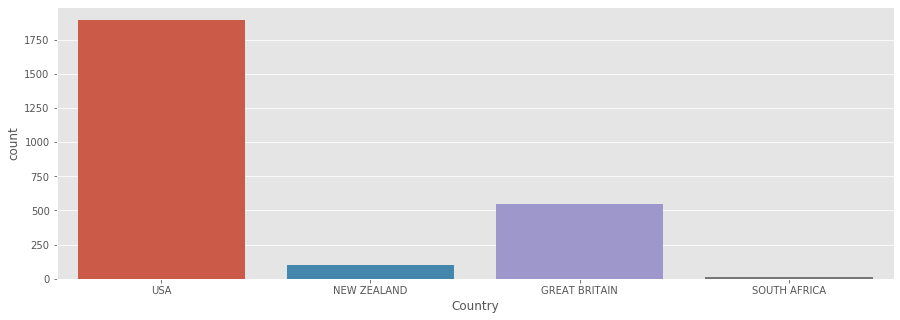

In [62]:
print(aerial['Country'].value_counts())
plt.figure(figsize = (15,5))
sns.countplot(aerial['Country'])
plt.show()

ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: Target Country, dtype: int64


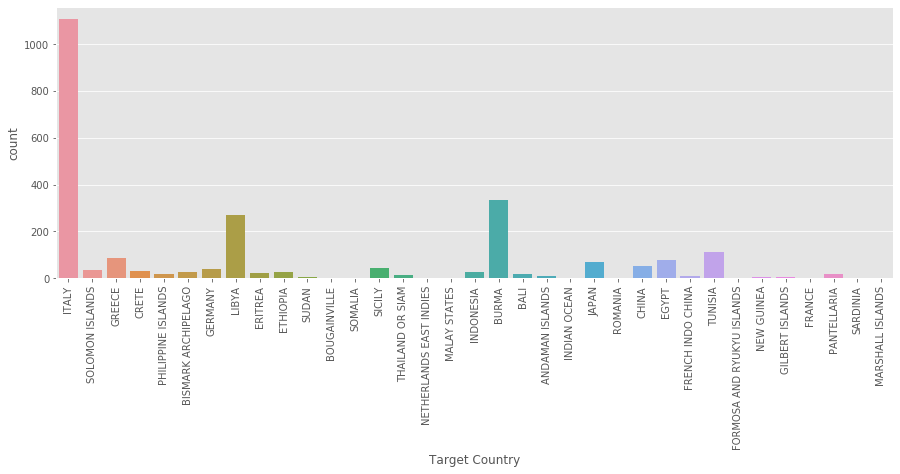

In [63]:
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize = (15,5))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

In [64]:
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

A36             990
B25             416
B24             337
BLEN            180
LIB             145
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: Aircraft Series, dtype: int64


MTO            1802
CBI             425
PTO             247
ETO              44
EAST AFRICA      37
Name: Theater of Operations, dtype: int64


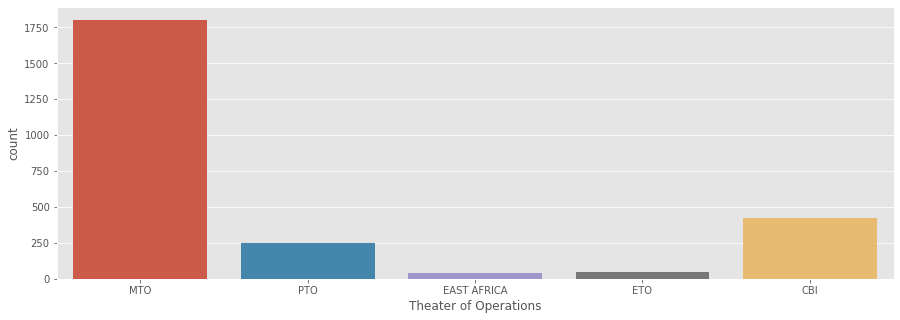

In [65]:
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize = (15,5))
sns.countplot(aerial['Theater of Operations'])
plt.show()

### Data visualization of weather station locations

In [66]:
weather_stations = pd.read_csv('Weather Station Locations.csv')
weather = pd.read_csv('Summary of Weather.csv')

In [67]:
weather_station_location = weather_stations.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"]]
weather = weather.loc[:,["STA","Date","MeanTemp"]]

In [68]:
lat_long = weather_station_location[['Latitude', 'Longitude']]
lat_long.head()

Latitude  Longitude
0  36.383333   6.650000
1  35.616667   0.583333
2  36.716667   3.216667
3  36.116667   6.416667
4  27.683333  -8.083333

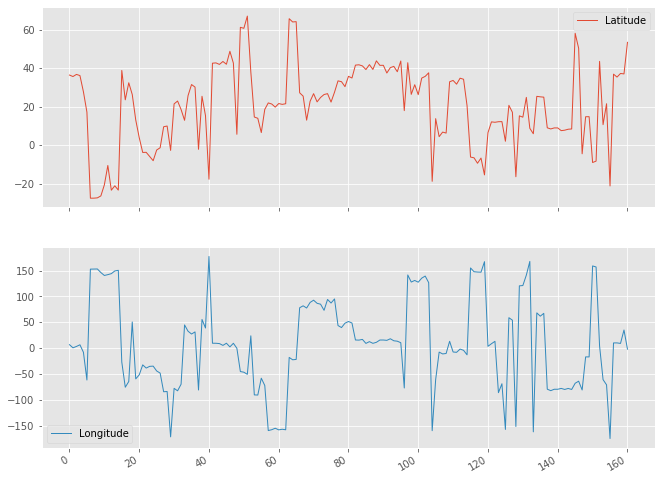

In [69]:
plt.style.use('ggplot')
lat_long= lat_long[:][:1000]
axes = lat_long[['Latitude', 'Longitude']].plot(figsize = (11,9), subplots = True, linewidth = 1)

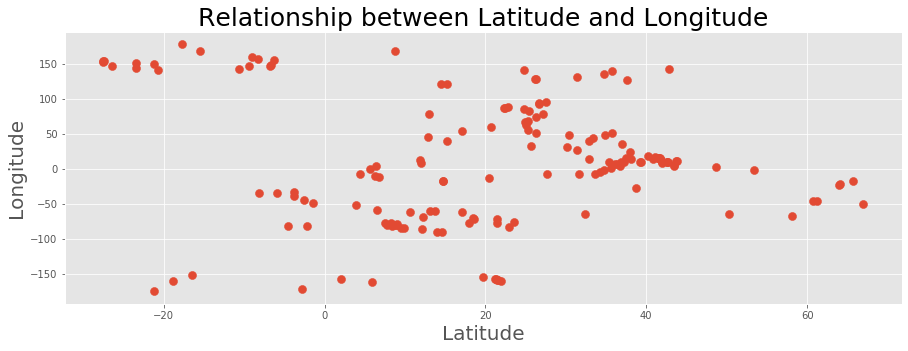

In [70]:
plt.figure(figsize = (15,5))
lat_long = lat_long[:][:1000]
plt.scatter(lat_long['Latitude'], lat_long['Longitude'], s = 65)
plt.xlabel('Latitude', fontsize = 20)
plt.ylabel('Longitude', fontsize = 20)
plt.title('Relationship between Latitude and Longitude', fontsize = 25)
plt.show()

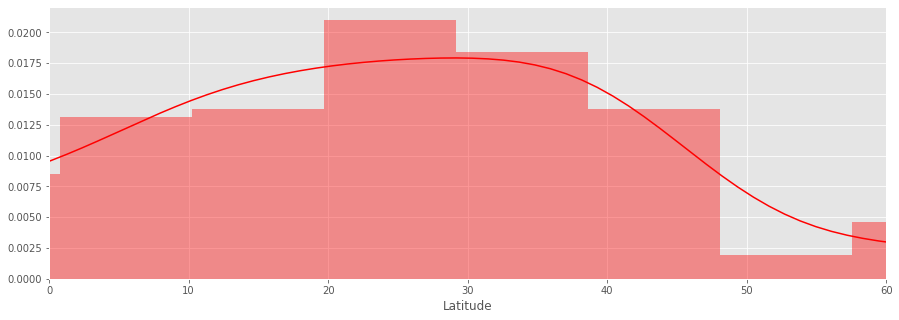

In [71]:
plt.figure(figsize = (15,5))
lat_long = lat_long[:][:1000]
sns.distplot(lat_long['Latitude'], color = 'red')
plt.xlabel('Latitude')
plt.xlim(0,60)
plt.show()

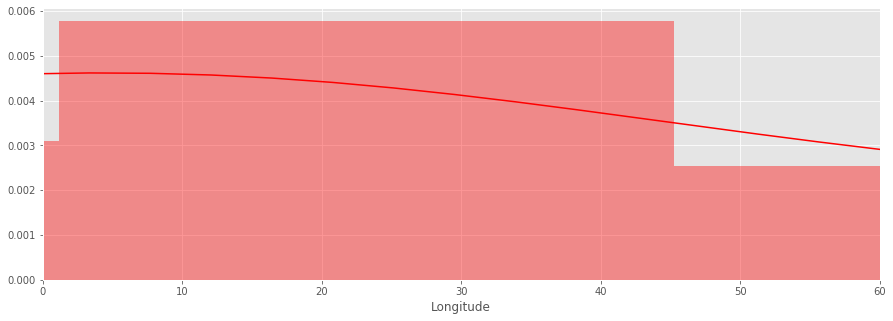

In [72]:
plt.figure(figsize = (15,5))
lat_long = lat_long[:][:1000]
sns.distplot(lat_long['Longitude'], color = 'red')
plt.xlabel('Longitude')
plt.xlim(0,60)
plt.show()

1. Lets visualize the nearest weather station i.e. "Bindukuri" located during the war of USA and Burma. 
2. It has temperature record from 1943 to 1945

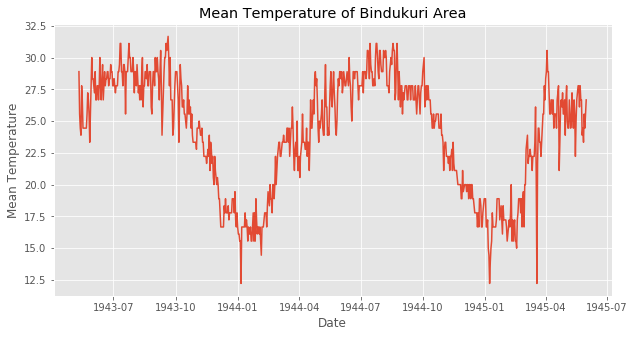

In [73]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN
weather_bin = weather[weather.STA == 32907]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize = (10,5))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

1. As you can see, we have temperature measurement from 1943 to 1945.
2. Temperature ossilates between 12 and 32 degrees.
3. Temperature of winter months is colder than temperature of summer months.

In [74]:
aerial = pd.read_csv('operations.csv')
aerial["year"] = [ each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial = aerial[aerial["year"]>="1943"]
aerial = aerial[aerial["month"]>="8"]

aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]
liste = []
aa = []
for each in aerial_war["Mission Date"]:
    dummy = weather_bin[weather_bin.Date == each]
    liste.append(dummy["MeanTemp"].values)
aerial_war["dene"] = liste
for each in aerial_war.dene.values:
    aa.append(each[0])

# Create a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = "Bombing temperature"
)
layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace,trace1]

fig = dict(data = data, layout = layout)
iplot(fig)

1. Green line is mean temperature that is measured in Bindukuri.
2. Blue markers are bombing dates and bombing date temperature.
3. As it can be seen from plot, USA bomb at high temperatures.
